# Assignment 3

In [1]:
#Import packages
import matplotlib.pyplot as plt
import numpy as np 
import math 
import cv2
import os
import PIL
from PIL import Image
import skimage 
from skimage.filters import gaussian

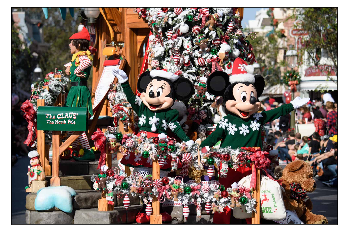

In [70]:
#Load and display image
img_path = r'C:\Users\kbchi\Documents\school\csc481-image-processing\assignments\assignment-3\mickey-minnie-christmas.jpg'
img = cv2.imread(img_path)  
#Convert to rgb
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
# #Hide axes 
plt.xticks([]), plt.yticks([])
plt.show()

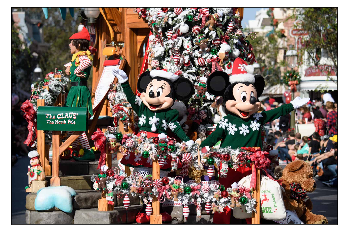

In [71]:
#Convert to rgb
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.xticks([]), plt.yticks([])
plt.imshow(img2)

_____________

## Problem 1  
a) Read and display an image of your choice. (To help you with the next problem, look for an
image that has interesting objects of different intensities.)  
b) Calculate and display the histogram of this image.  
c) Enhance the contrast of the intensity image using histogram equalization and display both the
uniform histogram and the newly enhanced intensity image.  
d) Explain why the two histograms (of the original image and of the enhanced image) are
different.  


481 Students: (10/0) Apply a local enhancement approach on this image and show your results.
Before you start, consider how your image might call for a particular window size. For fun, you
might want to try a few different window sizes. One student actually put the window size in a
loop from 1 to the image size and showed the results in a video. The gauntlet has been thrown. 

### Image Histogram

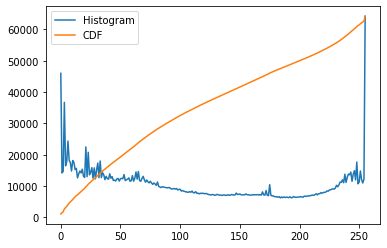

In [72]:
#Pixel frequencies
frequencies = cv2.calcHist([img2], [0], None, [256], [0,256]) 

#CDF
cdf = frequencies.cumsum()
cdf_norm = cdf * frequencies.max()/cdf.max()

#Plot histogram
plt.plot(frequencies, label = 'Histogram')
plt.plot(cdf_norm, label = 'CDF')
plt.legend()
plt.show() 

### Histogram Equalization

In [77]:
#Convert img for equalizeHist
img_conv = np.uint8(img)
img_eq = cv2.equalizeHist(img2)

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-2b5g8ysb\opencv\modules\imgproc\src\histogram.cpp:3439: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'cv::equalizeHist'


NOTE: I can't seem to get this to work without having to break out the R, G, B elements seperately. I did some reseach on the error and everything points to converting the img to 8-bit, which I believe is what the above code is doing. Any thoughts? I also tried img_conv = img.astype(np.uint8) which didn't work either.

<Figure size 432x288 with 0 Axes>

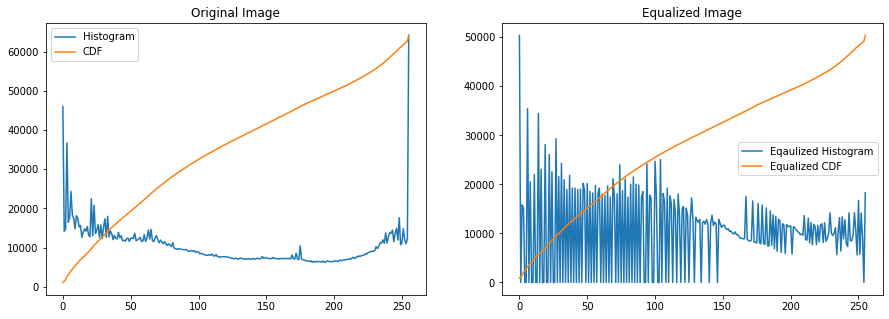

<Figure size 432x288 with 0 Axes>

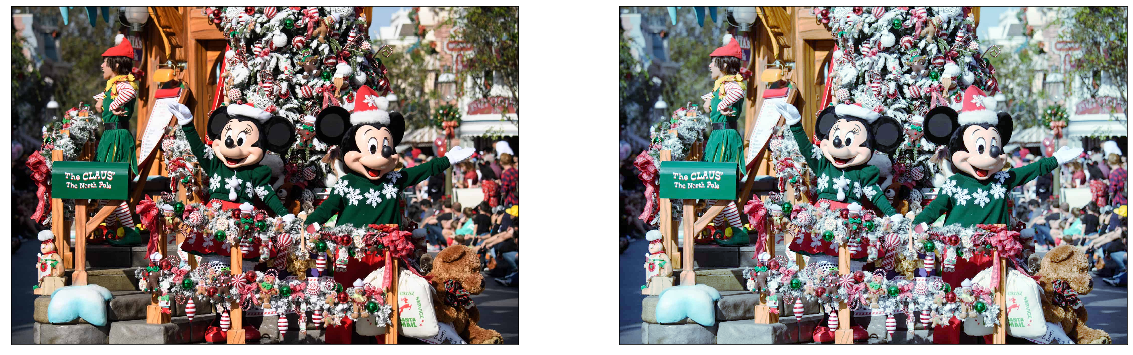

In [222]:
#Equalizing RGB
b, g, r = cv2.split(img2)
eq_r = cv2.equalizeHist(r) #equalizing red component
eq_g = cv2.equalizeHist(g) #equalizing green component
eq_b = cv2.equalizeHist(b) #equalizing blue component

#Merge image
eq_img = cv2.merge((eq_r, eq_g, eq_b)) 
#eq_img rgb
eq_img_rgb = cv2.cvtColor(eq_img, cv2.COLOR_BGR2RGB)

#Equalized histogram
eq_hist = cv2.calcHist([eq_img], [0], None, [256], [0,256]) 

#Eqaulized CDF
eq_cdf = eq_hist.cumsum()
eq_cdf_norm = cdf * eq_hist.max()/cdf.max()

#Plot new histograms
plt.clf()
fig = plt.figure()
fig.set_size_inches(15, 5)
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Original Image')
ax1.plot(frequencies, label = 'Histogram')
ax1.plot(cdf_norm, label = 'CDF')
ax1.legend()
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Equalized Image')
ax2.plot(eq_hist, label = 'Eqaulized Histogram')
ax2.plot(eq_cdf_norm, label = 'Equalized CDF')
ax2.legend()
plt.show()

# Plot images
plt.clf()
fig = plt.figure()
fig.set_size_inches(20, 20)
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img2)
plt.xticks([]), plt.yticks([])
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(eq_img_rgb)
plt.xticks([]), plt.yticks([])
plt.show()

#### Thoughts  
After equalizing the image, the histogram shows intensities that are more uniformly distributed than in the original image, thus bringing lower contrast intense areas to a higher level of intensity. You can see this best in the image in areas like the mailbox, the teddy bear, and the ornaments on the tree. 

### 481 Portion - Gaussian Blur  
Apply a local enhancement approach on this image and show your results.
Before you start, consider how your image might call for a particular window size. For fun, you
might want to try a few different window sizes. One student actually put the window size in a
loop from 1 to the image size and showed the results in a video. The gauntlet has been thrown.

#### Gaussian Blur

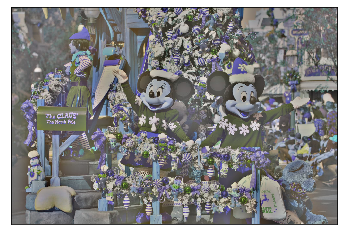

In [107]:
def gaussian_blur(img, kernel_size, sigmax):
    
    #Blur image based on function params
    blur = cv2.GaussianBlur(img,(kernel_size, kernel_size), sigmax)
    #Apply blur to image
    blur_img = cv2.subtract(img, blur, dtype = cv2.CV_32F)
    #Normalized image
    norm_img = cv2.normalize(blur_img, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)
    return norm_img

plt.xticks([]), plt.yticks([])
plt.imshow(gaussian_blur(img, kernel_size = 915, sigmax = 50))

### Testing with different kernel_size and sigmax values

In [113]:
kern_size = [5, 55, 355, 715, 1005]
sigmaX = [5, 10, 20, 30, 40, 50]

images = []

#Loop for creating images with various blurs
for i in range(len(kern_size)):
        blur_img = gaussian_blur(img, kernel_size = kern_size[i], sigmax = sigmaX[i])
        images.append(blur_img)

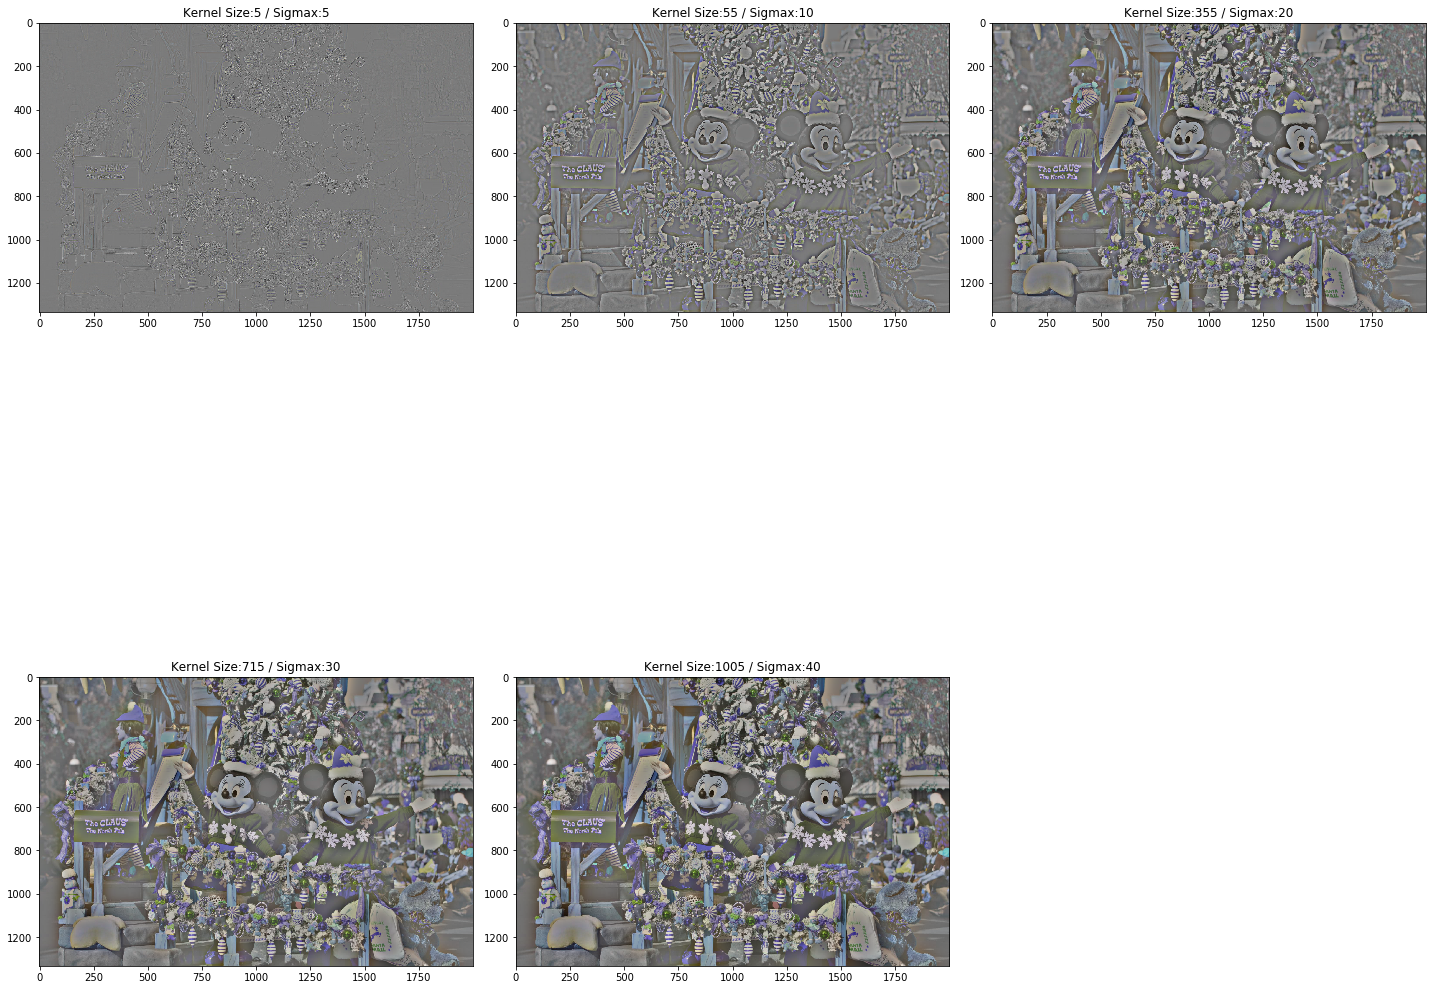

In [140]:
#Plotting blurred images
rows = 2
cols = 3
axes = []
fig = plt.figure()

for i in range((rows * cols) - 1):
    img_ = images[i]
    fig.set_size_inches(20, 20)
    axes.append(fig.add_subplot(rows, cols, i + 1))
    subplot_title = ("Kernel Size:{0} / Sigmax:{1}".format(kern_size[i], sigmaX[i]))
    axes[-1].set_title(subplot_title)  
    plt.imshow(img_)
fig.tight_layout()    
plt.show()

__________________

## Problem 2  
Implement histogram based segmentation on your image as follows:  
a) Show your image.  
b) Display the histogram and identify the peaks of your histogram with the “objects” that they
correspond to.  
c) Specify the ranges that you will use to identify the binary objects.  
d) Show the identified objects as binary images for each range. (Remember to scale the images
for display so that objects can be seen.)  
e) Finally construct the histogram-based segmented image, by combining the binary images.  

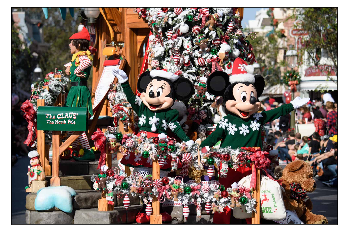

In [142]:
#Show image
plt.xticks([]), plt.yticks([])
plt.imshow(img2)

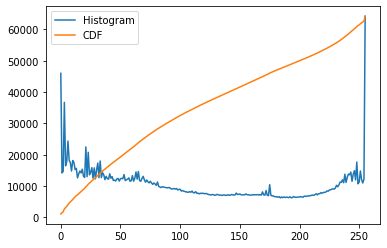

In [145]:
#Plot histogram
plt.plot(frequencies, label = 'Histogram')
plt.plot(cdf_norm, label = 'CDF')
plt.legend()
plt.show() 

#### Thoughts  
There are a quite a few noticable areas of this histogram. Starting on the left: 

0 ~ 20: The things in this range would be most of the shadows in the image as well as anything black (i.e. Mickey and Minnie's ears, the elf's belt, people's hair, clothes, or shoes.  
25 ~ 75: Some of the darker colors will be in this range. I'm not sure if mickey or minnie's sweaters are dark enough but perhaps those shades of green. he rock base of the float and some of the darker areas on the tree like the gingerbread men, the grey in the store fronts on the left, and maybe some darker clothes like dark jeans.   
175 ~ 225: Starting wish some of the brighter intensities, This would be some of the ornaments like the lighter gingerbread men and green and red balls, some of the trees that are in the sun, most of the wood on the float structure and the elf's scarf.  
230~250: These are the brightest pixels in the image and are probably the easiest ones to identify. Here we have all of the whites in the Santa hats, candy cane striped ornaments, snowflakes, santas list, and the whites on the storefronts on the right side of the image.  

### Threshold Binary Image

<Figure size 432x288 with 0 Axes>

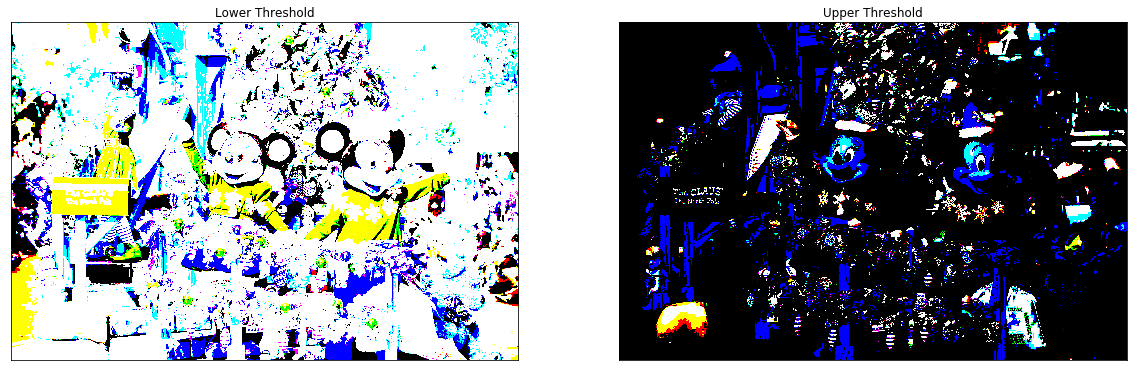

In [219]:
#Create thresholds for 25 on the lower end and 229 on the upper end 
ret, thresh_lower = cv2.threshold(img, 25, 255, cv2.THRESH_BINARY)
ret, thresh_upper = cv2.threshold(img, 229, 255, cv2.THRESH_BINARY)

# Plot images
plt.clf()
fig = plt.figure()
fig.set_size_inches(20, 20)
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Lower Threshold')
ax1.imshow(thresh_lower)
plt.xticks([]), plt.yticks([])
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Upper Threshold')
ax2.imshow(thresh_upper)
plt.xticks([]), plt.yticks([])
plt.show()

<Figure size 432x288 with 0 Axes>

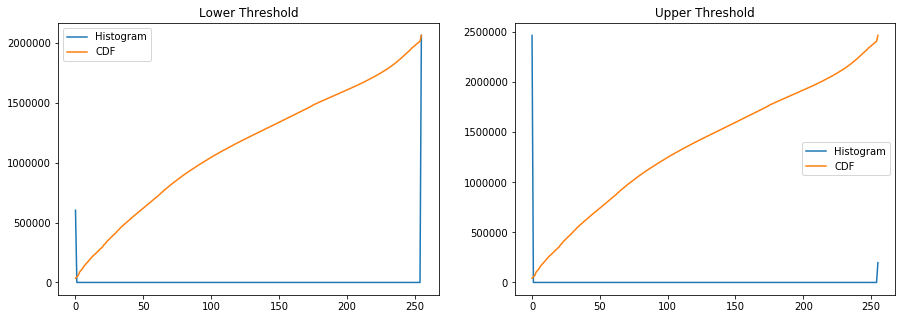

In [220]:
#Thresh histograms
lower_hist = cv2.calcHist([thresh_lower], [0], None, [256], [0,256])
upper_hist = cv2.calcHist([thresh_upper], [0], None, [256], [0,256])

#Thresh CDFs
lower_cdf = lower_hist.cumsum()
lower_cdf_norm = cdf * lower_hist.max()/cdf.max()
upper_cdf = upper_hist.cumsum()
upper_cdf_norm = cdf * upper_hist.max()/cdf.max()

#Plot new histograms
plt.clf()
fig = plt.figure()
fig.set_size_inches(15, 5)
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Lower Threshold')
ax1.plot(lower_hist, label = 'Histogram')
ax1.plot(lower_cdf_norm, label = 'CDF')
ax1.legend()
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Upper Threshold')
ax2.plot(upper_hist, label = 'Histogram')
ax2.plot(upper_cdf_norm, label = 'CDF')
ax2.legend()
plt.show()

#### Thoughts  
Not surprisingly, the lower theshold histogram shows a much higher spike in max pixel values than low pixel values, and visa versa for the upper threshold histogram. Something to note is that there are more pixels that got converted to 0 for the upper threshold image than got converted to 255 for the lower threshold image. This shows that there are more pixels in the original image that are on the higher levels of intensity. 

___________________

## Problem 3  

Bit place splicing (https://en.wikipedia.org/wiki/Bit_plane) is a simple form of frequency
analysis in which the frequencies are defined by the bits representing the intensity of the pixels.
Write a program to perform bit-place splicing on an image such that you can generate a figure
similar to the one shown in the Wikipedia article: your original image and each of the 8 bit
planes in it. Perhaps the key lesson is that each bit-position represents a different binary image.

In [55]:
#Load greyscale image
img_grey= cv2.imread(img_path, 0)  

In [66]:
#Function for creating bit-plone images based on the param num_planes
def img_bit_planes_transforms(img, num_planes):
    
    #Empty list for bit plane image
    bit_images = []
    
    #Add original image to bit_images
    bit_images.append(img)
    
    #Loop to construct bit planes and images
    for i in range(0, num_planes):
        plane = np.full((img.shape[0], img.shape[1]), 2 ** i, np.uint8)
        bit_plane_img = cv2.bitwise_and(plane, img)
        bit_images.append(bit_plane_img)
        
    #PLot images
    rows = round(num_planes / 2)
    cols = round(num_planes / 2)
    axes = []
    fig = plt.figure()
    
    #Plot images
    for i in range(0, num_planes + 1):
        img_ = bit_images[i]
        fig.set_size_inches(20, 20)
        axes.append(fig.add_subplot(rows, cols, i + 1))
        subplot_title = ('Bit-Plane {0}'.format(i))
        axes[-1].set_title(subplot_title)  
        plt.xticks([]), plt.yticks([])
        plt.imshow(img_)
        
    fig.tight_layout()    
    plt.show()

#### Testing Function

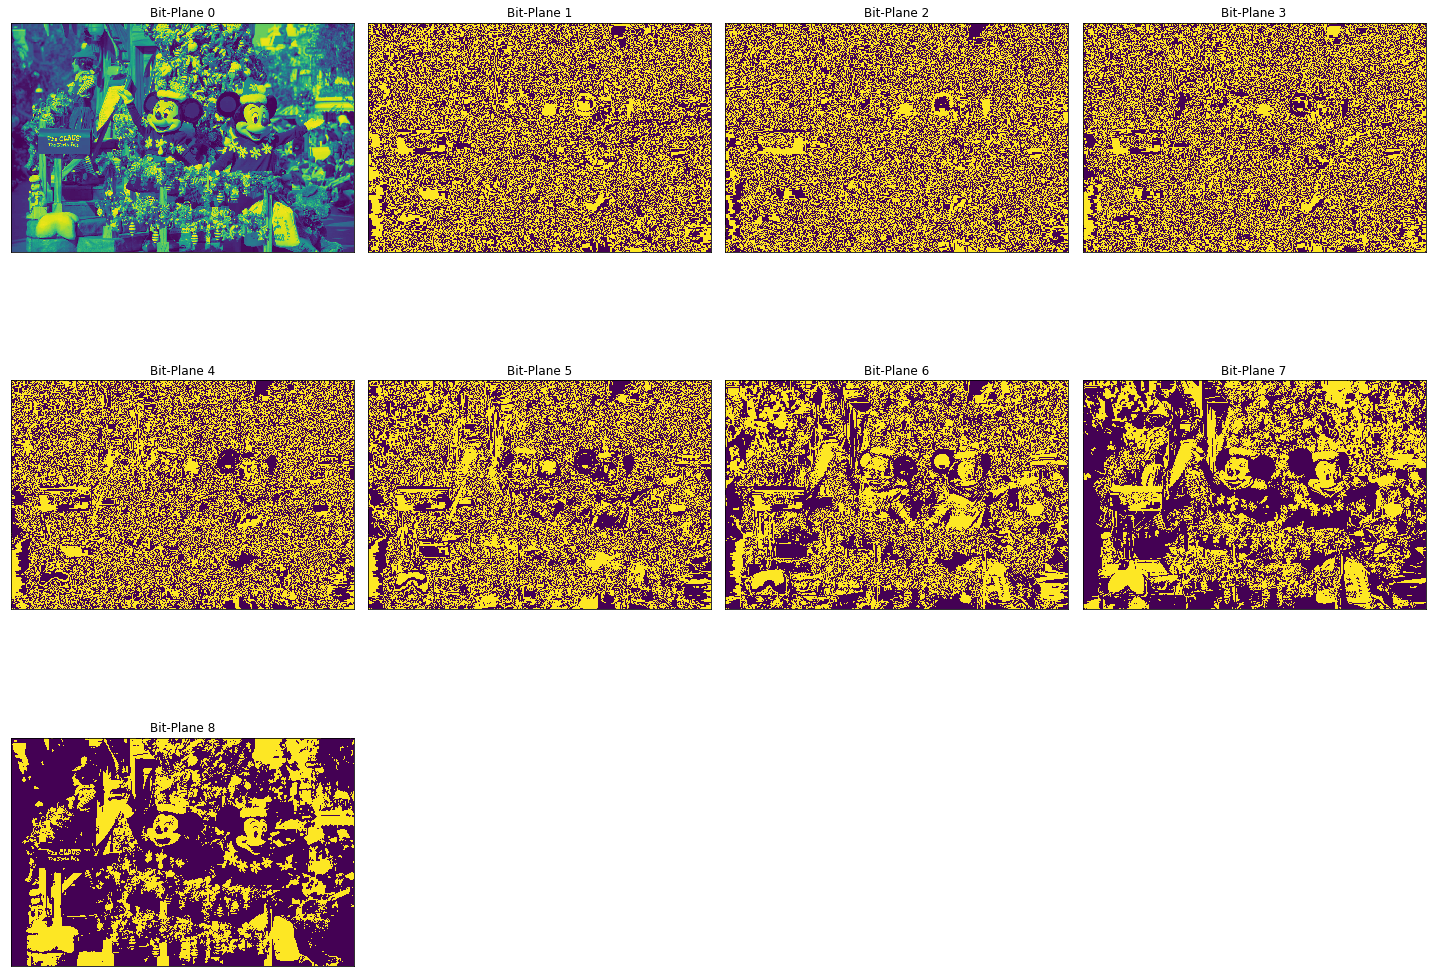

In [68]:
img_bit_planes_transforms(img_grey, num_planes = 8)